In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_df  = pd.read_csv('Train.csv')
train_df

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No
...,...,...
5405,PRV57759,No
5406,PRV57760,No
5407,PRV57761,No
5408,PRV57762,No


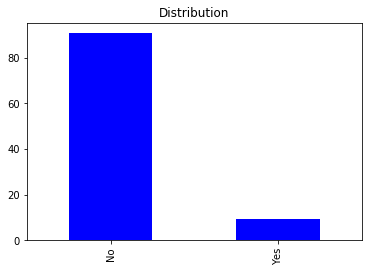

In [3]:
T_fraud = train_df['PotentialFraud'].value_counts()
grouped_train_df = T_fraud.to_frame()

grouped_train_df.columns = ['count']
grouped_train_df['Fraud'] = grouped_train_df.index
grouped_train_df['Percentage'] = (grouped_train_df['count']/sum(grouped_train_df['count']))*100
grouped_train_df['Percentage'].plot( kind='bar',color = "blue", title = 'Distribution')

In [4]:
out_df = pd.read_csv('Train_Outpatientdata.csv')
out_df

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517732,BENE159198,CLM510792,2009-08-06,2009-08-06,PRV53699,800,PHY364188,PHY364188,PHY385752,2163,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
517733,BENE159198,CLM551294,2009-08-29,2009-08-29,PRV53702,400,PHY423019,PHY332284,NaN,07041,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
517734,BENE159198,CLM596444,2009-09-24,2009-09-24,PRV53676,60,PHY361063,NaN,NaN,V570,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
517735,BENE159198,CLM636992,2009-10-18,2009-10-18,PRV53689,70,PHY403198,NaN,PHY419379,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [5]:
out_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
BeneID                    517737 non-null object
ClaimID                   517737 non-null object
ClaimStartDt              517737 non-null object
ClaimEndDt                517737 non-null object
Provider                  517737 non-null object
InscClaimAmtReimbursed    517737 non-null int64
AttendingPhysician        516341 non-null object
OperatingPhysician        90617 non-null object
OtherPhysician            195046 non-null object
ClmDiagnosisCode_1        507284 non-null object
ClmDiagnosisCode_2        322357 non-null object
ClmDiagnosisCode_3        203257 non-null object
ClmDiagnosisCode_4        125596 non-null object
ClmDiagnosisCode_5        74344 non-null object
ClmDiagnosisCode_6        48756 non-null object
ClmDiagnosisCode_7        32961 non-null object
ClmDiagnosisCode_8        22912 non-null object
ClmDiagnosisCode_9        14838 non-null object
ClmDiagnosisCo

In [6]:
procedures_df = pd.DataFrame(columns = ['Procedures'])
procedures_df['Procedures'] = pd.concat([out_df["ClmProcedureCode_1"], out_df["ClmProcedureCode_2"], out_df["ClmProcedureCode_3"]], axis=0, sort=True).dropna()
procedures_df['Procedures']

8167      9672.0
9326      4573.0
14740       66.0
30435       66.0
35839     5123.0
           ...  
505299    4019.0
14740      412.0
144351    4401.0
386644    4299.0
427167    2724.0
Name: Procedures, Length: 202, dtype: float64

In [7]:
grouped_procedure = procedures_df['Procedures'].value_counts()
grouped_procedure

9904.0    15
3722.0     8
4516.0     8
2724.0     7
66.0       7
          ..
3772.0     1
3522.0     1
5304.0     1
9961.0     1
2763.0     1
Name: Procedures, Length: 104, dtype: int64

In [8]:
diagnosis_df = pd.DataFrame(columns = ['Diagnosis'])
diagnosis_df['Diagnosis'] = pd.concat([out_df["ClmDiagnosisCode_1"],out_df["ClmDiagnosisCode_2"],out_df["ClmDiagnosisCode_3"],out_df["ClmDiagnosisCode_4"],out_df["ClmDiagnosisCode_5"],out_df["ClmDiagnosisCode_6"],out_df["ClmDiagnosisCode_7"],out_df["ClmDiagnosisCode_8"],out_df["ClmDiagnosisCode_9"],out_df["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()
diagnosis_df['Diagnosis'].head(10)

0    78943
1     6115
2     2723
3    71988
4    82382
5    20381
6    V6546
7    72290
8    71856
9     7237
Name: Diagnosis, dtype: object

In [9]:
grouped_diagnosis = diagnosis_df['Diagnosis'].value_counts()
grouped_diagnosis

4019     62903
25000    30022
2724     28423
V5869    24359
4011     23534
         ...  
E9059        1
94450        1
65903        1
V2504        1
86800        1
Name: Diagnosis, Length: 10846, dtype: int64

In [10]:
grouped_procedure = grouped_procedure.to_frame()

In [11]:
grouped_procedure.columns = ['count']
grouped_procedure['Procedure'] = grouped_procedure.index
grouped_procedure['Percentage'] = (grouped_procedure['count']/sum(grouped_procedure['count']))*100
grouped_procedure['Percentage']

9904.0    7.425743
3722.0    3.960396
4516.0    3.960396
2724.0    3.465347
66.0      3.465347
            ...   
3772.0    0.495050
3522.0    0.495050
5304.0    0.495050
9961.0    0.495050
2763.0    0.495050
Name: Percentage, Length: 104, dtype: float64

In [12]:
grouped_diagnosis = grouped_diagnosis.to_frame()
grouped_diagnosis.columns = ['count']
grouped_diagnosis['Diagnosis'] = grouped_diagnosis.index
grouped_diagnosis['Percentage'] = (grouped_diagnosis['count']/sum(grouped_diagnosis['count']))*100
grouped_diagnosis['Percentage']

4019     4.647817
25000    2.218285
2724     2.100137
V5869    1.799853
4011     1.738895
           ...   
E9059    0.000074
94450    0.000074
65903    0.000074
V2504    0.000074
86800    0.000074
Name: Percentage, Length: 10846, dtype: float64

In [13]:
#take the first 70 
grouped_procedure70 = grouped_procedure.head(70)
grouped_diagnosis70 = grouped_diagnosis.head(70)

/home/betty/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


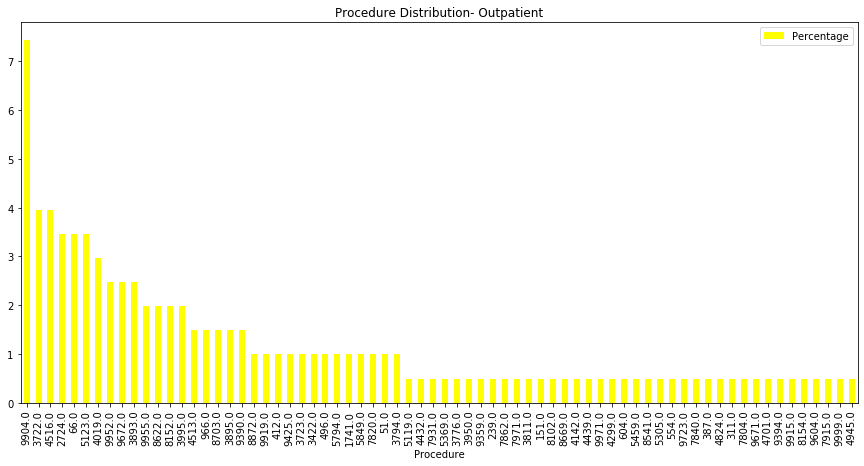

In [14]:
#plotting the most commonly used diagnosis and procedures in outpatients

grouped_procedure70['Procedure'] =grouped_procedure70['Procedure'].astype(str)
grouped_procedure70.sort_values(by = ['Percentage'])
grouped_procedure70.plot(x ='Procedure', y='Percentage', kind='bar', color ='yellow',
                   title='Procedure Distribution- Outpatient', figsize=(15,7));

/home/betty/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


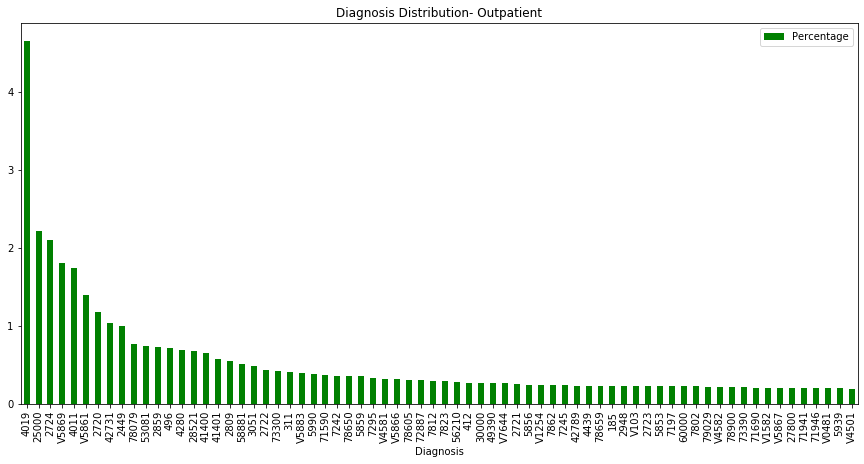

In [15]:
grouped_diagnosis70['Diagnosis'] =grouped_diagnosis70['Diagnosis'].astype(str)
grouped_diagnosis70.sort_values(by = ['Percentage'])
grouped_diagnosis70.plot(x ='Diagnosis', y='Percentage', kind='bar', color ='green',
                   title='Diagnosis Distribution- Outpatient', figsize=(15,7));

In [16]:
 in_df = pd.read_csv('Train_Inpatientdata.csv')

In [17]:
in_df.head(10)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN
5,BENE11017,CLM70950,2009-10-06,2009-10-12,PRV54986,8000,PHY402711,PHY402711,PHY402711,2009-10-06,...,2948,25000,25002,NaN,863.0,NaN,NaN,NaN,NaN,NaN
6,BENE11018,CLM32075,2009-01-02,2009-01-07,PRV54090,8000,PHY412314,PHY347494,NaN,2009-01-02,...,2948,2809,56210,NaN,4576.0,NaN,NaN,NaN,NaN,NaN
7,BENE11028,CLM62376,2009-08-03,2009-08-07,PRV51148,6000,PHY346286,PHY405514,NaN,2009-08-03,...,2851,4439,41401,NaN,9904.0,NaN,NaN,NaN,NaN,NaN
8,BENE11031,CLM62784,2009-08-06,2009-08-09,PRV55839,7000,PHY385030,NaN,NaN,2009-08-06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,BENE11034,CLM31519,2008-12-29,2009-01-05,PRV55215,29000,PHY355604,PHY415867,NaN,2008-12-29,...,4019,4111,4589,NaN,3612.0,4139.0,NaN,NaN,NaN,NaN


In [18]:
in_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
BeneID                    40474 non-null object
ClaimID                   40474 non-null object
ClaimStartDt              40474 non-null object
ClaimEndDt                40474 non-null object
Provider                  40474 non-null object
InscClaimAmtReimbursed    40474 non-null int64
AttendingPhysician        40362 non-null object
OperatingPhysician        23830 non-null object
OtherPhysician            4690 non-null object
AdmissionDt               40474 non-null object
ClmAdmitDiagnosisCode     40474 non-null object
DeductibleAmtPaid         39575 non-null float64
DischargeDt               40474 non-null object
DiagnosisGroupCode        40474 non-null object
ClmDiagnosisCode_1        40474 non-null object
ClmDiagnosisCode_2        40248 non-null object
ClmDiagnosisCode_3        39798 non-null object
ClmDiagnosisCode_4        38940 non-null object
ClmDiagnosisCode_5        37

In [19]:
procedures_df2 = pd.DataFrame(columns = ['Procedures'])
procedures_df2['Procedures'] = pd.concat([in_df["ClmProcedureCode_1"], in_df['ClmProcedureCode_2'],in_df['ClmProcedureCode_3'],
                                         in_df['ClmProcedureCode_4'],in_df['ClmProcedureCode_5'],in_df['ClmProcedureCode_6']],
                                        axis = 0, sort = True).dropna()
procedures_df2['Procedures']

1        7092.0
3         331.0
4        3893.0
5         863.0
6        4576.0
          ...  
11891    4139.0
15685    4139.0
26786    9971.0
27568    2724.0
33084    9982.0
Name: Procedures, Length: 29692, dtype: float64

In [20]:
diagnosis_df2 = pd.DataFrame(columns = ['Diagnosis'])
diagnosis_df2['Diagnosis'] = pd.concat([in_df['ClmDiagnosisCode_1'],in_df['ClmDiagnosisCode_2'],in_df['ClmDiagnosisCode_3'],
                                       in_df['ClmDiagnosisCode_4'],in_df['ClmDiagnosisCode_5'],in_df['ClmDiagnosisCode_6'],
                                       in_df['ClmDiagnosisCode_7'],in_df['ClmDiagnosisCode_8'],in_df['ClmDiagnosisCode_9'],
                                       in_df['ClmDiagnosisCode_10']],axis = 0, sort = True).dropna()
diagnosis_df2['Diagnosis']

0         1970
1         6186
2        29623
3        43491
4          042
         ...  
40432     5533
40456    V0481
40457     2875
40467     2724
40469     4148
Name: Diagnosis, Length: 327328, dtype: object

In [21]:
grouped_procedure2 = procedures_df2['Procedures'].value_counts()
grouped_diagnosis2 = diagnosis_df2['Diagnosis'].value_counts()

In [22]:
grouped_procedure2 = grouped_procedure2.to_frame()
grouped_diagnosis2 = grouped_diagnosis2.to_frame()

In [23]:
grouped_procedure2.columns = ['count']
grouped_procedure2['Procedure'] = grouped_procedure2.index
grouped_procedure2['Percentage'] = (grouped_procedure2['count']/sum(grouped_procedure2['count']))*100
grouped_procedure2['Percentage']

4019.0    6.577529
9904.0    3.829314
2724.0    3.526202
8154.0    3.438637
66.0      3.010912
            ...   
2042.0    0.003368
5193.0    0.003368
4682.0    0.003368
5314.0    0.003368
394.0     0.003368
Name: Percentage, Length: 1321, dtype: float64

In [24]:
grouped_diagnosis2.columns = ['count']
grouped_diagnosis2['Diagnosis'] = grouped_diagnosis2.index
grouped_diagnosis2['Percentage'] = (grouped_diagnosis2['count']/sum(grouped_diagnosis2['count']))*100
grouped_diagnosis2['Percentage']

4019     4.323798
2724     2.242399
25000    2.240566
41401    1.968057
4280     1.891070
           ...   
7817     0.000306
65571    0.000306
80026    0.000306
9711     0.000306
86600    0.000306
Name: Percentage, Length: 4716, dtype: float64

In [25]:
#take the first 50 
grouped_procedure50 = grouped_procedure2.head(50)
grouped_diagnosis50 = grouped_diagnosis.head(50)

/home/betty/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


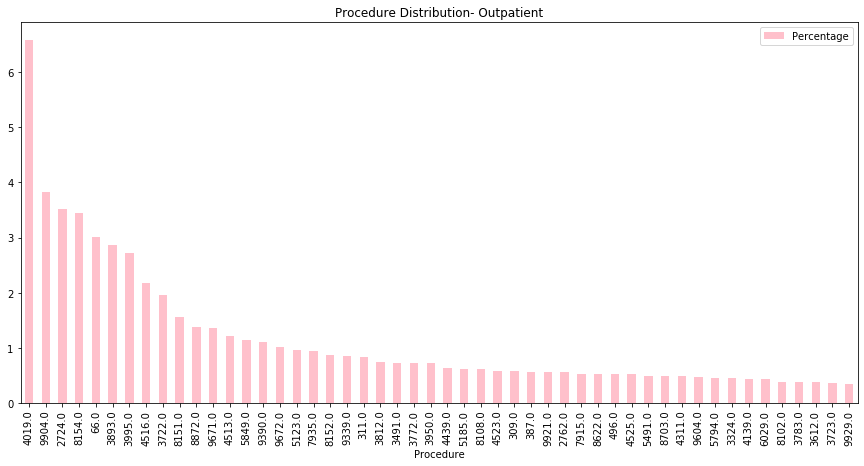

In [26]:
#plotting the most commonly used diagnosis and procedures in outpatients

grouped_procedure50['Procedure'] =grouped_procedure50['Procedure'].astype(str)
grouped_procedure50.sort_values(by = ['Percentage'])
grouped_procedure50.plot(x ='Procedure', y='Percentage', kind='bar', color ='pink',
                   title='Procedure Distribution- Outpatient', figsize=(15,7));

/home/betty/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


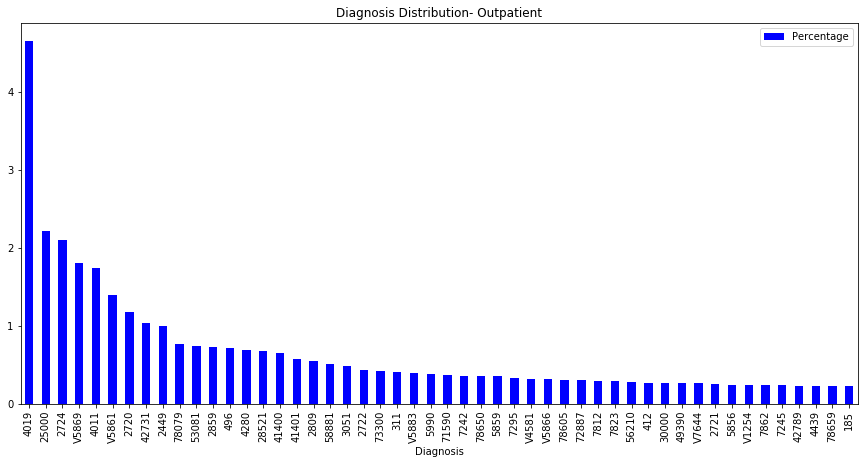

In [27]:
grouped_diagnosis50['Diagnosis'] =grouped_diagnosis50['Diagnosis'].astype(str)
grouped_diagnosis50.sort_values(by = ['Percentage'])
grouped_diagnosis50.plot(x ='Diagnosis', y='Percentage', kind='bar', color ='blue',
                   title='Diagnosis Distribution- Outpatient', figsize=(15,7));

In [28]:
#Most commonprocedures provided by most likely fradulent providers

Train_f = pd.DataFrame(columns = ['PotentialFraud', 'Provider'])
Train_f = train_df.loc[(train_df['PotentialFraud']== 'Yes')]
Train_f

,Provider,PotentialFraud
1,PRV51003,Yes
3,PRV51005,Yes
13,PRV51021,Yes
25,PRV51037,Yes
37,PRV51052,Yes
...,...,...
5307,PRV57642,Yes
5324,PRV57667,Yes
5329,PRV57672,Yes
5351,PRV57697,Yes


In [29]:
ipfraud_provider = pd.merge(in_df,Train_f, how = 'inner', on = 'Provider')
ipfraud_provider

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
1,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,...,2753,E9305,NaN,7769.0,5849.0,NaN,NaN,NaN,NaN,Yes
2,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,...,43812,4019,NaN,9338.0,NaN,NaN,NaN,NaN,NaN,Yes
3,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,...,NaN,NaN,NaN,8154.0,NaN,NaN,NaN,NaN,NaN,Yes
4,BENE24402,CLM32911,2009-01-08,2009-01-12,PRV55912,3000,PHY380413,PHY432598,NaN,2009-01-08,...,NaN,NaN,NaN,8543.0,NaN,NaN,NaN,NaN,NaN,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23397,BENE142565,CLM37075,2009-02-05,2009-02-09,PRV55514,18000,PHY380221,PHY392672,NaN,2009-02-05,...,7265,7140,V1582,8151.0,NaN,NaN,NaN,NaN,NaN,Yes
23398,BENE105735,CLM52218,2009-05-22,2009-05-30,PRV56566,12000,PHY344703,PHY344703,NaN,2009-05-22,...,42789,2948,NaN,9671.0,NaN,NaN,NaN,NaN,NaN,Yes
23399,BENE135136,CLM60037,2009-07-17,2009-07-19,PRV55852,5000,PHY336944,NaN,NaN,2009-07-17,...,51889,0413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
23400,BENE135136,CLM70804,2009-10-05,2009-10-11,PRV55852,5000,PHY356585,PHY356585,NaN,2009-10-05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes


In [30]:
#Number of inpatients who have interracted with fraudulent providers
len(ipfraud_provider)

23402

In [31]:
#Calculating the percentage of patients who have interracted with fradulent providers
(len(ipfraud_provider)/len(in_df))*100

57.81983495577408

In [32]:
#OUTPATIENT

opfraud_provider = pd.merge(out_df,Train_f, how = 'inner', on = 'Provider')
opfraud_provider

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,PotentialFraud
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409,Yes
1,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Yes
2,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947,Yes
3,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,NaN,NaN,20381,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Yes
4,BENE11004,CLM224741,2009-03-03,2009-03-03,PRV56011,40,PHY345721,NaN,NaN,V6546,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189389,BENE144674,CLM478399,2009-07-19,2009-07-19,PRV56012,200,PHY349406,NaN,NaN,72401,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,7242,Yes
189390,BENE158989,CLM204673,2009-02-19,2009-02-20,PRV56012,90,PHY427933,NaN,NaN,29590,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Yes
189391,BENE111157,CLM82006,2008-12-15,2008-12-28,PRV51119,95580,PHY409901,PHY396304,PHY396304,0389,...,2762,9672.0,5119.0,NaN,NaN,NaN,NaN,865,51881,Yes
189392,BENE119614,CLM738809,2009-12-21,2009-12-21,PRV55472,90,PHY358448,NaN,NaN,V187,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Yes


In [33]:
#calculating the percentage of outpatients who have interracted with fraudulent providers

(len(opfraud_provider)/len(out_df))*100

36.58112130290089

In [34]:
#Most used procedures and diagnosis by fraudulent providers

#INPATIENT

f_procedures_df2 = pd.DataFrame(columns = ['Procedures'])
f_procedures_df2['Procedures'] = pd.concat([ipfraud_provider["ClmProcedureCode_1"], ipfraud_provider['ClmProcedureCode_2'],
                                          ipfraud_provider['ClmProcedureCode_3'],ipfraud_provider['ClmProcedureCode_4'],
                                          ipfraud_provider['ClmProcedureCode_5'],ipfraud_provider['ClmProcedureCode_6']],
                                        axis = 0, sort = True).dropna()
f_procedures_df2['Procedures']

1        7769.0
2        9338.0
3        8154.0
4        8543.0
5        3327.0
          ...  
5937     4139.0
10076    9971.0
14403    2724.0
19358    4139.0
20477    9982.0
Name: Procedures, Length: 17325, dtype: float64

In [35]:
grouped_f_inprocedures = f_procedures_df2['Procedures'].value_counts()
grouped_f_inprocedures = grouped_f_inprocedures.to_frame()

In [36]:
grouped_f_inprocedures.columns = ['Count']
grouped_f_inprocedures['Procedures'] = grouped_f_inprocedures.index
grouped_f_inprocedures['Percentage'] = (grouped_f_inprocedures['Count']/sum(grouped_f_inprocedures['Count']))*100
grouped_f_inprocedures['Percentage']

4019.0    6.562771
2724.0    3.699856
9904.0    3.630592
8154.0    3.544012
66.0      3.088023
            ...   
503.0     0.005772
8737.0    0.005772
302.0     0.005772
7791.0    0.005772
1519.0    0.005772
Name: Percentage, Length: 1121, dtype: float64

In [37]:
f_diagnosis_df2 = pd.DataFrame(columns = ['Diagnosis'])
f_diagnosis_df2['Diagnosis'] = pd.concat([ipfraud_provider['ClmDiagnosisCode_1'],ipfraud_provider['ClmDiagnosisCode_2'],
                                          ipfraud_provider['ClmDiagnosisCode_3'],ipfraud_provider['ClmDiagnosisCode_4'],
                                          ipfraud_provider['ClmDiagnosisCode_5'],ipfraud_provider['ClmDiagnosisCode_6'],
                                          ipfraud_provider['ClmDiagnosisCode_7'],ipfraud_provider['ClmDiagnosisCode_8'],
                                          ipfraud_provider['ClmDiagnosisCode_9'],ipfraud_provider['ClmDiagnosisCode_10']]
                                          ,axis = 0, sort = True).dropna()
f_diagnosis_df2['Diagnosis']

0         1970
1         4240
2        V5789
3        71535
4         2330
         ...  
23376     5845
23380     3320
23382     5849
23397    V1582
23401    42842
Name: Diagnosis, Length: 189329, dtype: object

In [38]:
grouped_f_indiagnosis = f_diagnosis_df2['Diagnosis'].value_counts()
grouped_f_indiagnosis = grouped_f_indiagnosis.to_frame()

In [39]:
grouped_f_indiagnosis.columns = ['count']
grouped_f_indiagnosis['Diagnosis'] = grouped_f_indiagnosis.index
grouped_f_indiagnosis['Percentage'] = (grouped_f_indiagnosis['count']/sum(grouped_f_indiagnosis['count']))*100
grouped_f_indiagnosis['Percentage']

4019     4.286718
25000    2.243713
2724     2.242129
41401    1.977510
4280     1.893529
           ...   
67454    0.000528
75162    0.000528
9171     0.000528
E8903    0.000528
V0950    0.000528
Name: Percentage, Length: 4167, dtype: float64

In [40]:
indiagnois_f_plot = grouped_f_indiagnosis.head(20)
inprocedure_f_plot = grouped_f_inprocedures.head(20)

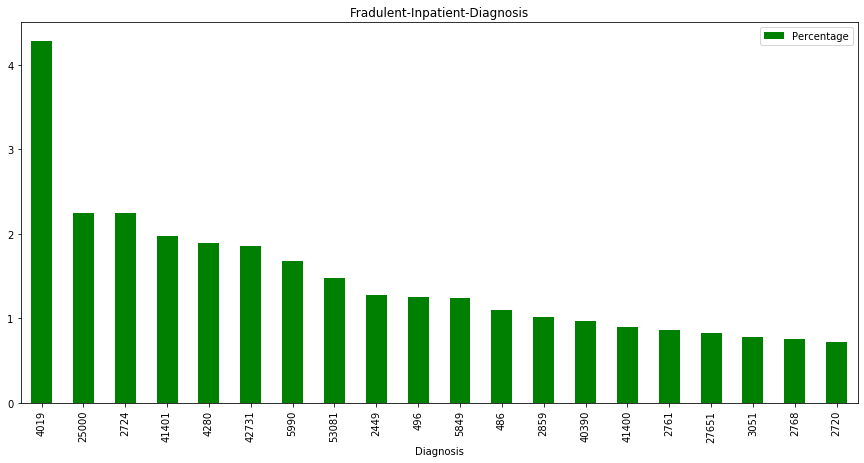

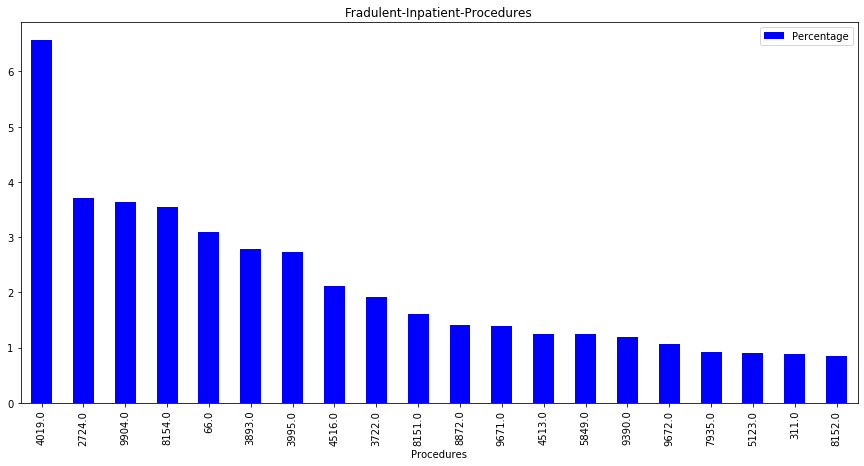

In [41]:
indiagnois_f_plot.plot(x = 'Diagnosis', y='Percentage', kind= 'bar', color = 'Green', title = 'Fradulent-Inpatient-Diagnosis', figsize=(15,7))
inprocedure_f_plot.plot(x = 'Procedures', y='Percentage', kind= 'bar', color = 'Blue',title = 'Fradulent-Inpatient-Procedures', figsize=(15,7))

In [42]:
#OUTPATIENT


f_procedures_df = pd.DataFrame(columns = ['Procedures'])
f_procedures_df['Procedures'] = pd.concat([opfraud_provider["ClmProcedureCode_1"], opfraud_provider['ClmProcedureCode_2'],
                                          opfraud_provider['ClmProcedureCode_3'],opfraud_provider['ClmProcedureCode_4'],
                                          opfraud_provider['ClmProcedureCode_5'],opfraud_provider['ClmProcedureCode_6']],
                                        axis = 0, sort = True).dropna()
f_procedures_df['Procedures']

2340      3723.0
5843      8703.0
6666      9904.0
6832      4573.0
11110     8154.0
           ...  
189391    5119.0
5843      4299.0
14060     4401.0
78436      412.0
78436     7840.0
Name: Procedures, Length: 90, dtype: float64

In [43]:
grouped_f_outprocedures = f_procedures_df['Procedures'].value_counts()
grouped_f_outprocedures = grouped_f_outprocedures.to_frame()

In [44]:
grouped_f_outprocedures.columns = ['Count']
grouped_f_outprocedures['Procedures'] = grouped_f_outprocedures.index
grouped_f_outprocedures['Percentage'] = (grouped_f_outprocedures['Count']/sum(grouped_f_outprocedures['Count']))*100
grouped_f_outprocedures['Percentage']

9904.0    5.555556
4516.0    5.555556
66.0      4.444444
9390.0    3.333333
8703.0    3.333333
9952.0    3.333333
5123.0    3.333333
3995.0    3.333333
7840.0    2.222222
4019.0    2.222222
5849.0    2.222222
3722.0    2.222222
9672.0    2.222222
4513.0    2.222222
496.0     2.222222
1741.0    2.222222
966.0     2.222222
8152.0    2.222222
51.0      1.111111
239.0     1.111111
3772.0    1.111111
3787.0    1.111111
4701.0    1.111111
8154.0    1.111111
604.0     1.111111
4299.0    1.111111
3783.0    1.111111
151.0     1.111111
4439.0    1.111111
8051.0    1.111111
8541.0    1.111111
387.0     1.111111
412.0     1.111111
9671.0    1.111111
8151.0    1.111111
8669.0    1.111111
7915.0    1.111111
8627.0    1.111111
4311.0    1.111111
2763.0    1.111111
5119.0    1.111111
3811.0    1.111111
3895.0    1.111111
9955.0    1.111111
7971.0    1.111111
4401.0    1.111111
8622.0    1.111111
4573.0    1.111111
7862.0    1.111111
7820.0    1.111111
4142.0    1.111111
7804.0    1.111111
3950.0    1.

In [45]:
f_diagnosis_df = pd.DataFrame(columns = ['Diagnosis'])
f_diagnosis_df['Diagnosis'] = pd.concat([opfraud_provider['ClmDiagnosisCode_1'],opfraud_provider['ClmDiagnosisCode_2'],
                                          opfraud_provider['ClmDiagnosisCode_3'],opfraud_provider['ClmDiagnosisCode_4'],
                                          opfraud_provider['ClmDiagnosisCode_5'],opfraud_provider['ClmDiagnosisCode_6'],
                                          opfraud_provider['ClmDiagnosisCode_7'],opfraud_provider['ClmDiagnosisCode_8'],
                                          opfraud_provider['ClmDiagnosisCode_9'],opfraud_provider['ClmDiagnosisCode_10']]
                                          ,axis = 0, sort = True).dropna()
f_diagnosis_df['Diagnosis']

0         78943
1         71988
2         82382
3         20381
4         V6546
          ...  
186438    25000
186778    E9179
187595     3310
189048     2859
189391     2762
Name: Diagnosis, Length: 494869, dtype: object

In [46]:
grouped_f_outdiagnosis = f_diagnosis_df['Diagnosis'].value_counts()
grouped_f_outdiagnosis = grouped_f_outdiagnosis.to_frame()

In [47]:
grouped_f_outdiagnosis.columns = ['count']
grouped_f_outdiagnosis['Diagnosis'] = grouped_f_outdiagnosis.index
grouped_f_outdiagnosis['Percentage'] = (grouped_f_outdiagnosis['count']/sum(grouped_f_outdiagnosis['count']))*100
grouped_f_outdiagnosis['Percentage']

4019     4.630114
25000    2.190277
2724     2.110660
V5869    1.780067
4011     1.720051
           ...   
30543    0.000202
36214    0.000202
7952     0.000202
86514    0.000202
37334    0.000202
Name: Percentage, Length: 9523, dtype: float64

In [48]:
outdiagnois_f_plot = grouped_f_outdiagnosis.head(20)
outprocedure_f_plot = grouped_f_outprocedures.head(20)

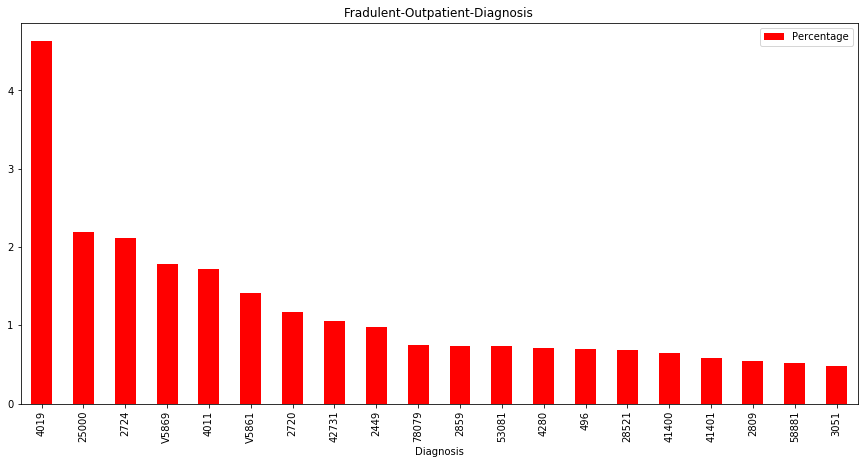

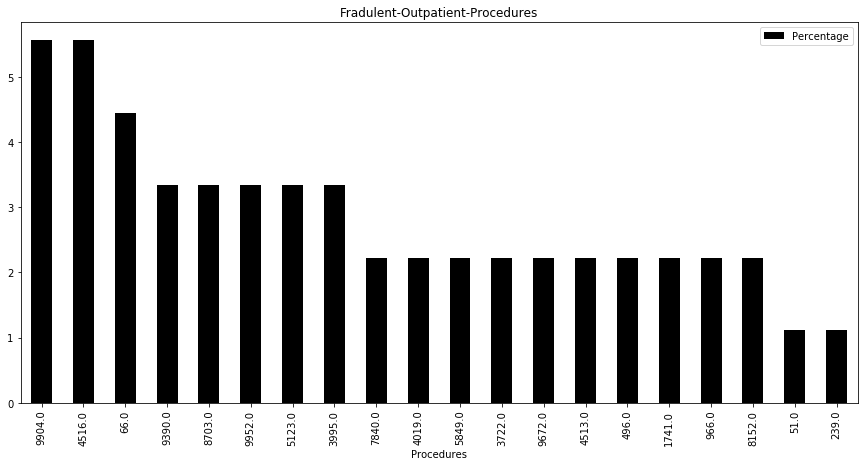

In [49]:
outdiagnois_f_plot.plot(x = 'Diagnosis', y='Percentage', kind= 'bar', color = 'Red', title = 'Fradulent-Outpatient-Diagnosis', figsize=(15,7))
outprocedure_f_plot.plot(x = 'Procedures', y='Percentage', kind= 'bar', color = 'Black',title = 'Fradulent-Outpatient-Procedures', figsize=(15,7))

### Discover states/localities have the highest number of potential frauds

In [50]:
beneficiary = pd. read_csv('Train_Beneficiarydata.csv')
beneficiary.head(10)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200
5,BENE11006,1976-09-01,NaN,2,1,0,23,810,12,12,...,2,2,2,2,2,2,0,0,500,0
6,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,...,2,1,2,1,1,2,0,0,1490,160
7,BENE11008,1934-02-01,NaN,2,1,0,15,140,12,12,...,2,1,2,2,2,2,0,0,30,0
8,BENE11009,1929-06-01,NaN,1,1,Y,44,230,12,12,...,2,1,2,2,2,2,0,0,100,0
9,BENE11010,1936-07-01,NaN,2,1,0,41,30,12,12,...,2,1,1,1,2,2,0,0,1170,660


In [51]:
fraud_beneficiary = pd.merge(beneficiary,ipfraud_provider, how = 'inner', on = 'BeneID')
fraud_beneficiary.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,PotentialFraud
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
1,BENE11017,1940-06-01,NaN,2,1,0,31,270,12,12,...,25000,25002,NaN,863.0,NaN,NaN,NaN,NaN,NaN,Yes
2,BENE11028,1941-12-01,NaN,1,1,0,38,230,12,12,...,4439,41401,NaN,9904.0,NaN,NaN,NaN,NaN,NaN,Yes
3,BENE11034,1946-03-01,NaN,2,1,0,34,760,12,12,...,4111,4589,NaN,3612.0,4139.0,NaN,NaN,NaN,NaN,Yes
4,BENE11034,1946-03-01,NaN,2,1,0,34,760,12,12,...,591,51881,NaN,9672.0,NaN,NaN,NaN,NaN,NaN,Yes


In [52]:
f_grouped_beneficiary = fraud_beneficiary['State'].value_counts()
f_grouped_beneficiary.head()

5     1986
10    1909
33    1706
45    1401
36    1223
Name: State, dtype: int64

In [53]:
f_grouped_beneficiary = f_grouped_beneficiary.to_frame()
f_grouped_beneficiary['Count'] = f_grouped_beneficiary['State']
f_grouped_beneficiary['STATE'] = f_grouped_beneficiary.index
f_grouped_beneficiary = f_grouped_beneficiary.drop(['State'],axis = 1)
f_grouped_beneficiary.head(10)

,Count,STATE
5,1986,5
10,1909,10
33,1706,33
45,1401,45
36,1223,36
14,998,14
34,924,34
39,852,39
31,745,31
49,702,49


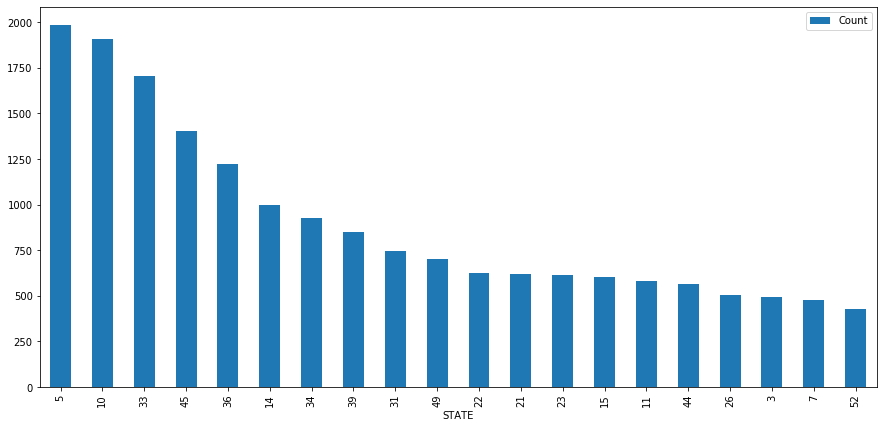

In [54]:
#plot the first 20
fgb20 = f_grouped_beneficiary.head(20)
fgb20.plot(x='STATE', y='Count', kind = 'bar', figsize= (15,7));

### Age range for probable fraudulent activities

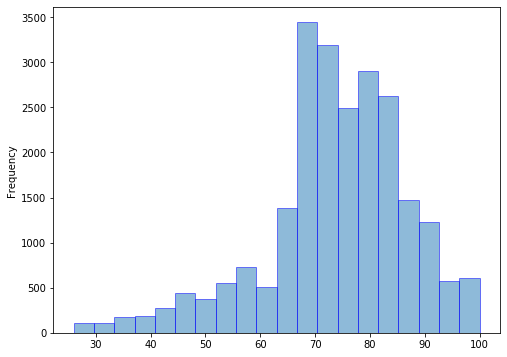

In [55]:
fraud_beneficiary['DOB'] = pd.to_datetime(fraud_beneficiary['DOB'], format='%Y-%m-%d')
now = pd.to_datetime('2009-12-01', format='%Y-%m-%d') # Assuming this is 2009 data as the last recorded death is for 2009
fraud_beneficiary['DOB'] = fraud_beneficiary['DOB'].where(fraud_beneficiary['DOB']< now)
fraud_beneficiary['age'] = (now - fraud_beneficiary['DOB']).astype('<m8[Y]')
ax = fraud_beneficiary['age'].plot.hist(bins=20, alpha=0.5, figsize=(8, 6), edgecolor='b')

### What is the average cost of potential fraud claims and also what is the cost as % of whole. Checking the outliers for such claims

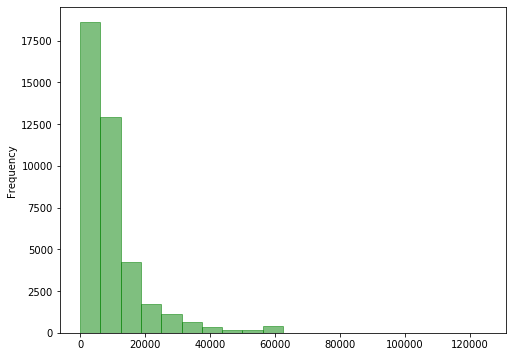

In [56]:
ax = in_df['InscClaimAmtReimbursed'].plot.hist(bins=20, alpha=0.5, figsize=(8, 6), facecolor='g', edgecolor='g')
# Insurance Claim amount reimbursed.

In [57]:
import seaborn as sns

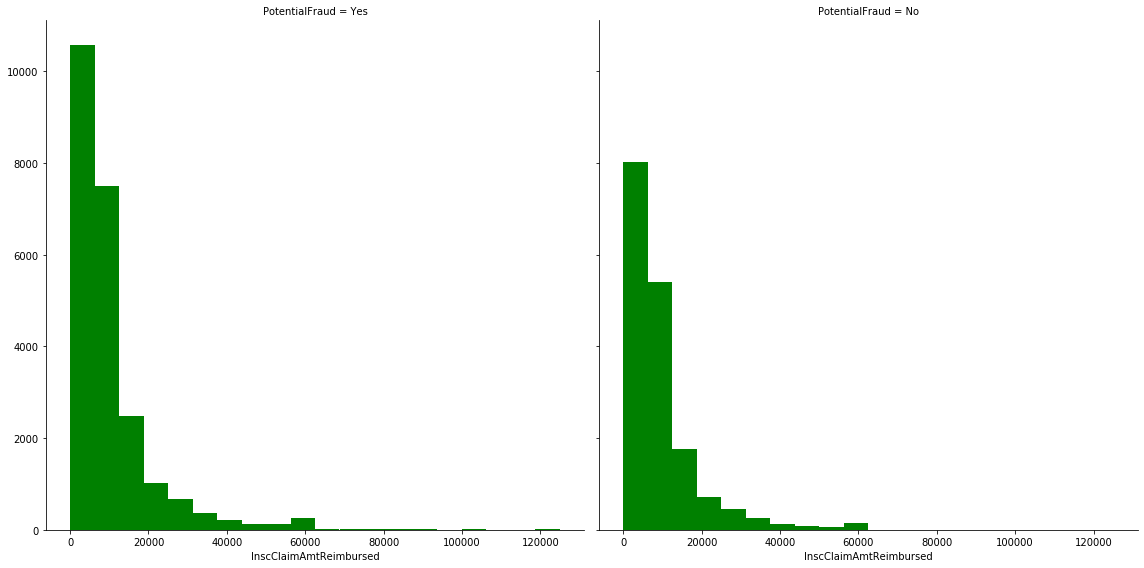

In [58]:
inpatient = pd.merge(in_df,train_df, how = 'inner', on = 'Provider')
g = sns.FacetGrid(inpatient, col='PotentialFraud', height=8)
g.map(plt.hist, 'InscClaimAmtReimbursed', bins=20, color = 'g')

In [59]:
inpatient = inpatient.loc[(inpatient['PotentialFraud']== 'Yes')]
Total = inpatient['InscClaimAmtReimbursed'].sum()
Total

241288510

###### That is roughly 240 million

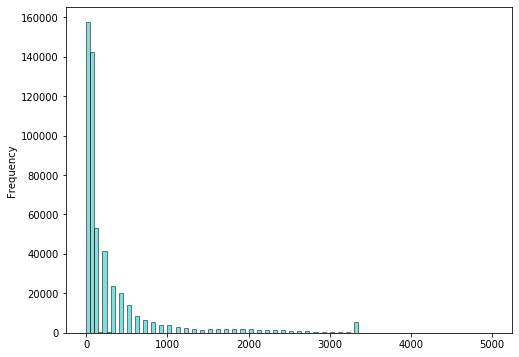

In [60]:
ax = out_df['InscClaimAmtReimbursed'].plot.hist(bins=100,range=[0,5000], alpha=0.5, figsize=(8, 6), facecolor='c', edgecolor='k')

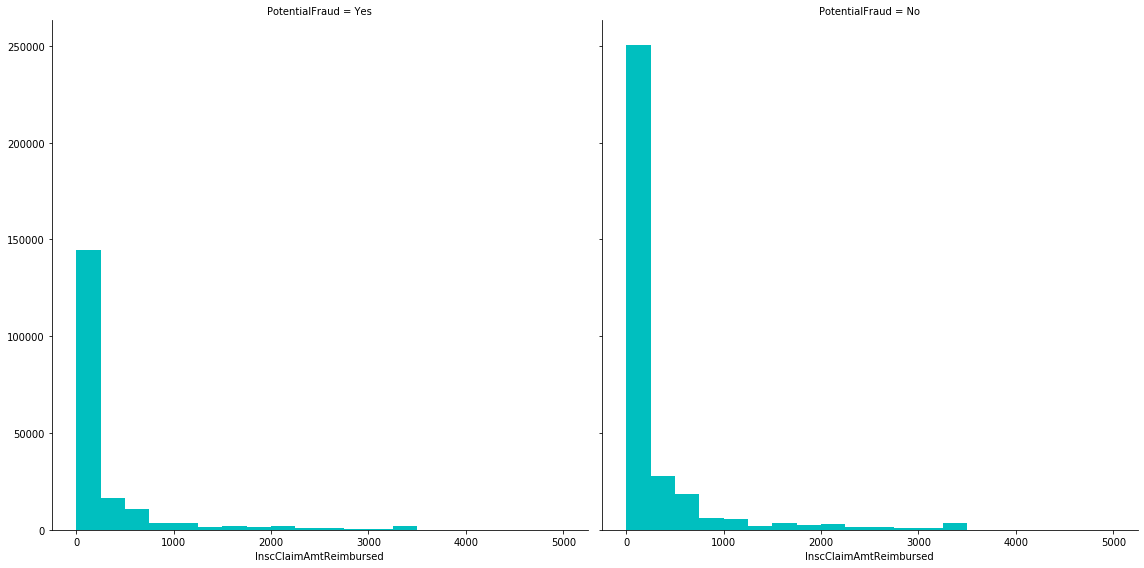

In [61]:
outpatient = pd.merge(out_df, train_df, how='inner', on='Provider')
g = sns.FacetGrid(outpatient, col='PotentialFraud', height=8)
g.map(plt.hist, 'InscClaimAmtReimbursed', bins=20, range=[0, 5000], color ='c')

In [62]:
beneficiary['DOB'] = pd.to_datetime(beneficiary['DOB'] , format = '%Y-%m-%d')
beneficiary['DOD'] = pd.to_datetime(beneficiary['DOD'],format = '%Y-%m-%d',errors='ignore')
beneficiary['Age'] = round(((beneficiary['DOD'] - beneficiary['DOB']).dt.days)/365)

In [63]:
beneficiary.Age.fillna(round(((pd.to_datetime('2009-12-01' , format = '%Y-%m-%d') - beneficiary['DOB']).dt.days)/365),
                                 inplace=True)

In [64]:
#creating master df
in_df['EncounterType'] = 0
out_df['EncounterType'] = 1
frames = [in_df, out_df]
TrainInOut = pd.concat(frames)
TrainInOutBenef = pd.merge(TrainInOut, beneficiary, how = 'inner', on= 'BeneID')

master_df = pd.merge(TrainInOutBenef, train_df, how = 'inner', on = 'Provider')
master_df.head()

/home/betty/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


,AdmissionDt,AttendingPhysician,BeneID,ClaimEndDt,ClaimID,ClaimStartDt,ClmAdmitDiagnosisCode,ClmDiagnosisCode_1,ClmDiagnosisCode_10,ClmDiagnosisCode_2,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,PotentialFraud
0,2009-04-12,PHY390922,BENE11001,2009-04-18,CLM46614,2009-04-12,7866,1970,NaN,4019,...,1,2,1,1,36000,3204,60,70,67.0,Yes
1,NaN,PHY365867,BENE16973,2009-09-06,CLM565430,2009-09-06,NaN,V7183,NaN,53081,...,1,2,2,2,24000,2136,450,200,78.0,Yes
2,2009-01-20,PHY349293,BENE17521,2009-02-01,CLM34721,2009-01-20,45340,4240,NaN,2639,...,1,2,2,2,19000,1068,100,20,96.0,Yes
3,2009-10-17,PHY334706,BENE21718,2009-11-04,CLM72336,2009-10-17,V5789,V5789,NaN,4168,...,1,1,2,2,17000,1068,1050,540,87.0,Yes
4,2009-10-25,PHY390614,BENE22934,2009-10-29,CLM73394,2009-10-25,71946,71535,NaN,71960,...,1,1,1,2,27000,2136,450,160,79.0,Yes


In [65]:
master_df['PotentialFraud'].value_counts()

No     345415
Yes    212796
Name: PotentialFraud, dtype: int64

In [66]:
master_df.isnull().sum()

AdmissionDt                        517737
AttendingPhysician                   1508
BeneID                                  0
ClaimEndDt                              0
ClaimID                                 0
ClaimStartDt                            0
ClmAdmitDiagnosisCode              412312
ClmDiagnosisCode_1                  10453
ClmDiagnosisCode_10                553201
ClmDiagnosisCode_2                 195606
ClmDiagnosisCode_3                 315156
ClmDiagnosisCode_4                 393675
ClmDiagnosisCode_5                 446287
ClmDiagnosisCode_6                 473819
ClmDiagnosisCode_7                 492034
ClmDiagnosisCode_8                 504767
ClmDiagnosisCode_9                 516396
ClmProcedureCode_1                 534901
ClmProcedureCode_2                 552721
ClmProcedureCode_3                 557242
ClmProcedureCode_4                 558093
ClmProcedureCode_5                 558202
ClmProcedureCode_6                 558211
DeductibleAmtPaid                 

In [67]:
# removing the column DOD and DOB also creating a new column IsDead as we already have the age we do not need date of death and date of birth 
master_df.loc[master_df['DOD'].isnull(), 'IsDead'] = '0'
master_df.loc[(master_df['DOD'].notnull()), 'IsDead'] = '1'
master_df = master_df.drop(['DOD'], axis = 1)
master_df = master_df.drop(['DOB'], axis = 1)

### Calculating the number of days a patient was admitted

In [68]:
master_df['AdmissionDt'] = pd.to_datetime(master_df['AdmissionDt'], format = '%Y-%m-%d')
master_df['DischargeDt'] = pd.to_datetime(master_df['DischargeDt'], format = '%Y-%m-%d')
master_df['DaysAdmitted'] = ((master_df['DischargeDt'] - master_df['AdmissionDt'] ).dt.days)+1
master_df.loc[master_df['EncounterType']==1, 'DaysAdmitted'] = '0'
master_df[['EncounterType','DaysAdmitted','DischargeDt','AdmissionDt']].head()
master_df = master_df.drop(['DischargeDt'], axis = 1)
master_df = master_df.drop(['AdmissionDt'], axis = 1)

In [69]:
master_df.loc[master_df['DeductibleAmtPaid'].isnull(), ['DeductibleAmtPaid']] = '0'

In [70]:
cols= ['ClmAdmitDiagnosisCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_10',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6']

In [71]:
master_df[cols]= master_df[cols].replace({np.nan:0})
master_df

,AttendingPhysician,BeneID,ClaimEndDt,ClaimID,ClaimStartDt,ClmAdmitDiagnosisCode,ClmDiagnosisCode_1,ClmDiagnosisCode_10,ClmDiagnosisCode_2,ClmDiagnosisCode_3,...,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,PotentialFraud,IsDead,DaysAdmitted
0,PHY390922,BENE11001,2009-04-18,CLM46614,2009-04-12,7866,1970,0,4019,5853,...,1,1,36000,3204,60,70,67.0,Yes,0,7
1,PHY365867,BENE16973,2009-09-06,CLM565430,2009-09-06,0,V7183,0,53081,78959,...,2,2,24000,2136,450,200,78.0,Yes,0,0
2,PHY349293,BENE17521,2009-02-01,CLM34721,2009-01-20,45340,4240,0,2639,2948,...,2,2,19000,1068,100,20,96.0,Yes,0,13
3,PHY334706,BENE21718,2009-11-04,CLM72336,2009-10-17,V5789,V5789,0,4168,73313,...,2,2,17000,1068,1050,540,87.0,Yes,0,19
4,PHY390614,BENE22934,2009-10-29,CLM73394,2009-10-25,71946,71535,0,71960,4019,...,1,2,27000,2136,450,160,79.0,Yes,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,PHY317497,BENE154147,2009-06-04,CLM394122,2009-06-02,0,71698,0,71941,7862,...,2,2,0,0,890,120,85.0,No,0,0
558207,PHY376238,BENE154687,2009-02-08,CLM184358,2009-02-08,99639,99661,0,0,0,...,1,2,0,0,4400,220,83.0,No,0,0
558208,PHY338096,BENE157378,2009-07-29,CLM460770,2009-07-09,0,5854,0,7907,0,...,2,2,0,0,14240,2810,64.0,No,0,0
558209,PHY416646,BENE158295,2009-04-16,CLM306999,2009-04-16,0,42789,0,0,0,...,1,2,0,0,640,350,85.0,No,0,0


In [72]:
for i in cols:
    master_df[i][master_df[i]!=0]=1

/home/betty/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [73]:
master_df[cols] = master_df[cols].astype(float)

In [74]:
master_df['TotalDiagnosis']= master_df['ClmDiagnosisCode_1']+master_df['ClmDiagnosisCode_10']+master_df['ClmDiagnosisCode_2']+ master_df['ClmDiagnosisCode_3']+master_df['ClmDiagnosisCode_4']+master_df['ClmDiagnosisCode_5']+master_df['ClmDiagnosisCode_6']+ master_df['ClmDiagnosisCode_7']+master_df['ClmDiagnosisCode_8']+ master_df['ClmDiagnosisCode_9']

In [75]:
master_df['TotalProcedure']= master_df['ClmProcedureCode_1']+master_df['ClmProcedureCode_2']+master_df['ClmProcedureCode_3']+ master_df['ClmProcedureCode_4']+ master_df['ClmProcedureCode_5']+master_df['ClmProcedureCode_6']

In [76]:
remove=['Provider','BeneID', 'ClaimID', 'ClaimStartDt','ClaimEndDt','AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
       'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
       'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6',
       'ClmAdmitDiagnosisCode','DeductibleAmtPaid','NoOfMonths_PartACov',
        'NoOfMonths_PartBCov','DiagnosisGroupCode',
        'State', 'County']

In [77]:
master_df.drop(columns = remove, axis = 1, inplace = True)

In [78]:
master_df.shape

(558211, 26)

In [79]:
master_df['RenalDiseaseIndicator'].value_counts()

0    448363
Y    109848
Name: RenalDiseaseIndicator, dtype: int64

In [80]:
master_df['RenalDiseaseIndicator'] = master_df['RenalDiseaseIndicator'].replace({'Y':1, '0':0})

In [81]:
master_df['RenalDiseaseIndicator'] = master_df['RenalDiseaseIndicator'].astype(int)

In [82]:
master_df.describe(include='O')

,PotentialFraud,IsDead,DaysAdmitted
count,558211,558211,558211
unique,2,2,37
top,No,0,0
freq,345415,554080,517737


In [83]:
master_df['IsDead'] = master_df['IsDead'].astype(float)
master_df['DaysAdmitted'] = master_df['DaysAdmitted'].astype(float)

In [84]:
master_df['PotentialFraud'] = master_df['PotentialFraud'].replace({'Yes':1,'No':0})
master_df['PotentialFraud'] = master_df['PotentialFraud'].astype(int)

In [85]:
x = master_df.drop('PotentialFraud', axis = 1)
y = master_df.loc[:,'PotentialFraud']

In [86]:
x.columns

Index(['EncounterType', 'InscClaimAmtReimbursed', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Age', 'IsDead',
       'DaysAdmitted', 'TotalDiagnosis', 'TotalProcedure'],
      dtype='object')

In [87]:
num_col= ['InscClaimAmtReimbursed',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Age',
       'DaysAdmitted', 'TotalDiagnosis', 'TotalProcedure']

In [88]:
numerical_columns= x.loc[:,num_col]
numerical_columns.describe()

,InscClaimAmtReimbursed,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,DaysAdmitted,TotalDiagnosis,TotalProcedure
count,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000
mean,997.012133,5227.971466,568.756807,2278.225348,649.698745,73.769770,0.483269,3.010897,0.053557
std,3821.534891,11786.274732,1179.172616,3881.846386,1002.020811,13.022524,2.300583,2.448213,0.280534
min,0.000000,-8000.000000,0.000000,-70.000000,0.000000,26.000000,0.000000,0.000000,0.000000
25%,40.000000,0.000000,0.000000,460.000000,120.000000,68.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,0.000000,1170.000000,340.000000,75.000000,0.000000,2.000000,0.000000
75%,300.000000,6000.000000,1068.000000,2590.000000,790.000000,82.000000,0.000000,4.000000,0.000000
max,125000.000000,161470.000000,38272.000000,102960.000000,13840.000000,101.000000,36.000000,10.000000,5.000000


In [89]:
cat_col= ['EncounterType', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke','IsDead']
x_cat= x.loc[:,cat_col]
x_cat

,EncounterType,Gender,Race,RenalDiseaseIndicator,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IsDead
0,0,1,1,0,1,2,1,2,2,1,1,1,2,1,1,0.0
1,1,1,1,0,1,1,1,2,2,2,2,1,2,2,2,0.0
2,0,2,1,0,1,1,1,2,1,2,2,1,2,2,2,0.0
3,0,1,1,0,2,2,2,2,2,2,2,1,1,2,2,0.0
4,0,2,1,0,2,1,2,2,1,2,1,1,1,1,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,1,2,1,0,2,2,2,2,2,2,2,1,1,2,2,0.0
558207,1,1,2,0,1,2,1,2,2,2,1,1,2,1,2,0.0
558208,1,2,1,1,1,1,1,2,1,2,1,1,2,2,2,0.0
558209,1,2,1,0,2,1,1,1,1,1,1,1,1,1,2,0.0


In [90]:
from sklearn.preprocessing import StandardScaler

In [91]:
scale= StandardScaler()
x_num= scale.fit_transform(x[num_col])

In [92]:
x_num= pd.DataFrame(x_num, columns=['InscClaimAmtReimbursed','IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt','OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Age','DaysAdmitted', 'TotalDiagnosis', 'TotalProcedure'])

x = pd.concat([x_num,x_cat], axis=1)
x

,InscClaimAmtReimbursed,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,DaysAdmitted,TotalDiagnosis,TotalProcedure,EncounterType,...,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IsDead
0,6.542662,2.610838,2.234826,-0.571436,-0.578530,-0.519851,2.832646,2.446318,-0.190910,0,...,1,2,2,1,1,1,2,1,1,0.0
1,-0.247810,1.592704,1.329105,-0.470968,-0.448792,0.324840,-0.210064,2.446318,-0.190910,1,...,1,2,2,2,2,1,2,2,2,0.0
2,4.710935,1.168481,0.423385,-0.561132,-0.628429,1.707062,5.440682,2.446318,6.938348,0,...,1,2,1,2,2,1,2,2,2,0.0
3,4.187585,0.998792,0.423385,-0.316403,-0.109478,1.015951,8.048719,2.446318,3.373719,0,...,2,2,2,2,2,1,1,2,2,0.0
4,3.140884,1.847237,1.329105,-0.470968,-0.488712,0.401630,1.963300,1.629395,3.373719,0,...,2,2,1,2,1,1,1,1,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,-0.130056,-0.443565,-0.482336,-0.357620,-0.528631,0.862371,-0.210064,-0.004451,-0.190910,1,...,2,2,2,2,2,1,1,2,2,0.0
558207,0.602635,-0.443565,-0.482336,0.546590,-0.428833,0.708790,-0.210064,-0.821374,-0.190910,1,...,1,2,2,2,1,1,2,1,2,0.0
558208,0.288625,-0.443565,-0.482336,3.081468,2.155946,-0.750222,-0.210064,-0.412913,-0.190910,1,...,1,2,1,2,1,1,2,2,2,0.0
558209,-0.258277,-0.443565,-0.482336,-0.422023,-0.299095,0.862371,-0.210064,-0.821374,-0.190910,1,...,1,1,1,1,1,1,1,1,2,0.0


### Train - Test split

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
x_train, x_test,y_train, y_test = train_test_split(x,y, test_size = 0.1, random_state = 42)

In [97]:
from sklearn.model_selection import GridSearchCV

In [98]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


In [100]:
estimator = DecisionTreeClassifier()
param_grid = {'criterion' :['gini','entropy'],
             'max_depth':[3,4,5],
             'min_samples_split':[2,3,5]}
grid_search = GridSearchCV(estimator=estimator,param_grid=param_grid )
grid_search.fit(x_train, y_train)
print(grid_search.best_score_)
print(grid_search.best_params_)

/home/betty/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.6301471568844063
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}


### Random forest

In [103]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, auc, roc_curve

In [105]:
from sklearn.ensemble import RandomForestClassifier
estimator1= RandomForestClassifier()
estimator1.fit(x_train, y_train)
model_score= estimator1.predict(x_train)
accuracy= estimator1.predict(x_test)
print(accuracy_score(y_train, model_score))
print(accuracy_score(y_test, accuracy))

/home/betty/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9725829984334848
0.6799290602271506


### Naive Bayes

In [106]:
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB()
bayes.fit(x_train, y_train)
train_pred = bayes.predict(x_train)
test_pred = bayes.predict(x_test)
print(accuracy_score(y_train,train_pred))
print(accuracy_score(y_test,test_pred))

0.6233436639735345
0.6254881587904411


### Logistic Regression

In [107]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(x_train, y_train)
train_pred= lr.predict(x_train)
test_pred= lr.predict(x_test)
print(accuracy_score(y_train,train_pred))
print(accuracy_score(y_test,test_pred))

/home/betty/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6299401459824956
0.6318297445451614


### After evaluation of various parameters

In [111]:
acc_score=[]

### Decision tree

In [112]:
import time
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score

In [113]:
estimator=  DecisionTreeClassifier(criterion= 'gini', max_depth=5, min_samples_split= 2)
estimator.fit(x_train, y_train)
model_score= estimator.predict(x_train)
accuracy= estimator.predict(x_test)
start = time.time()
estimator.score(x_train, y_train)

0.630274548208659

In [114]:
acc_random_forest = round(accuracy_score(y_test,accuracy)*100, 2)
f1_random_forest = round(f1_score(y_test,accuracy,average = "binary")*100, 2)
f_beta_random_forest = round(fbeta_score(y_test,accuracy,average = "binary",beta=0.5)*100, 2)

end = time.time()

acc_score.append({'Model':'Decision Tree', 'Score': accuracy_score(y_train, model_score), 'Accuracy': accuracy_score(y_test, accuracy), 'Time_Taken':end - start})

In [115]:
fn= ['InscClaimAmtReimbursed', 'IPAnnualReimbursementAmt',
    'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
    'OPAnnualDeductibleAmt', 'Age', 'DaysAdmitted',
    'TotalDiagnosis', 'TotalProcedure', 'EncounterType', 'Gender', 'Race',
    'RenalDiseaseIndicator', 'ChronicCond_Alzheimer',
    'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
    'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
    'ChronicCond_Depression', 'ChronicCond_Diabetes',
    'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
    'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke', 'IsDead']

In [116]:
cl=['No','Yes']

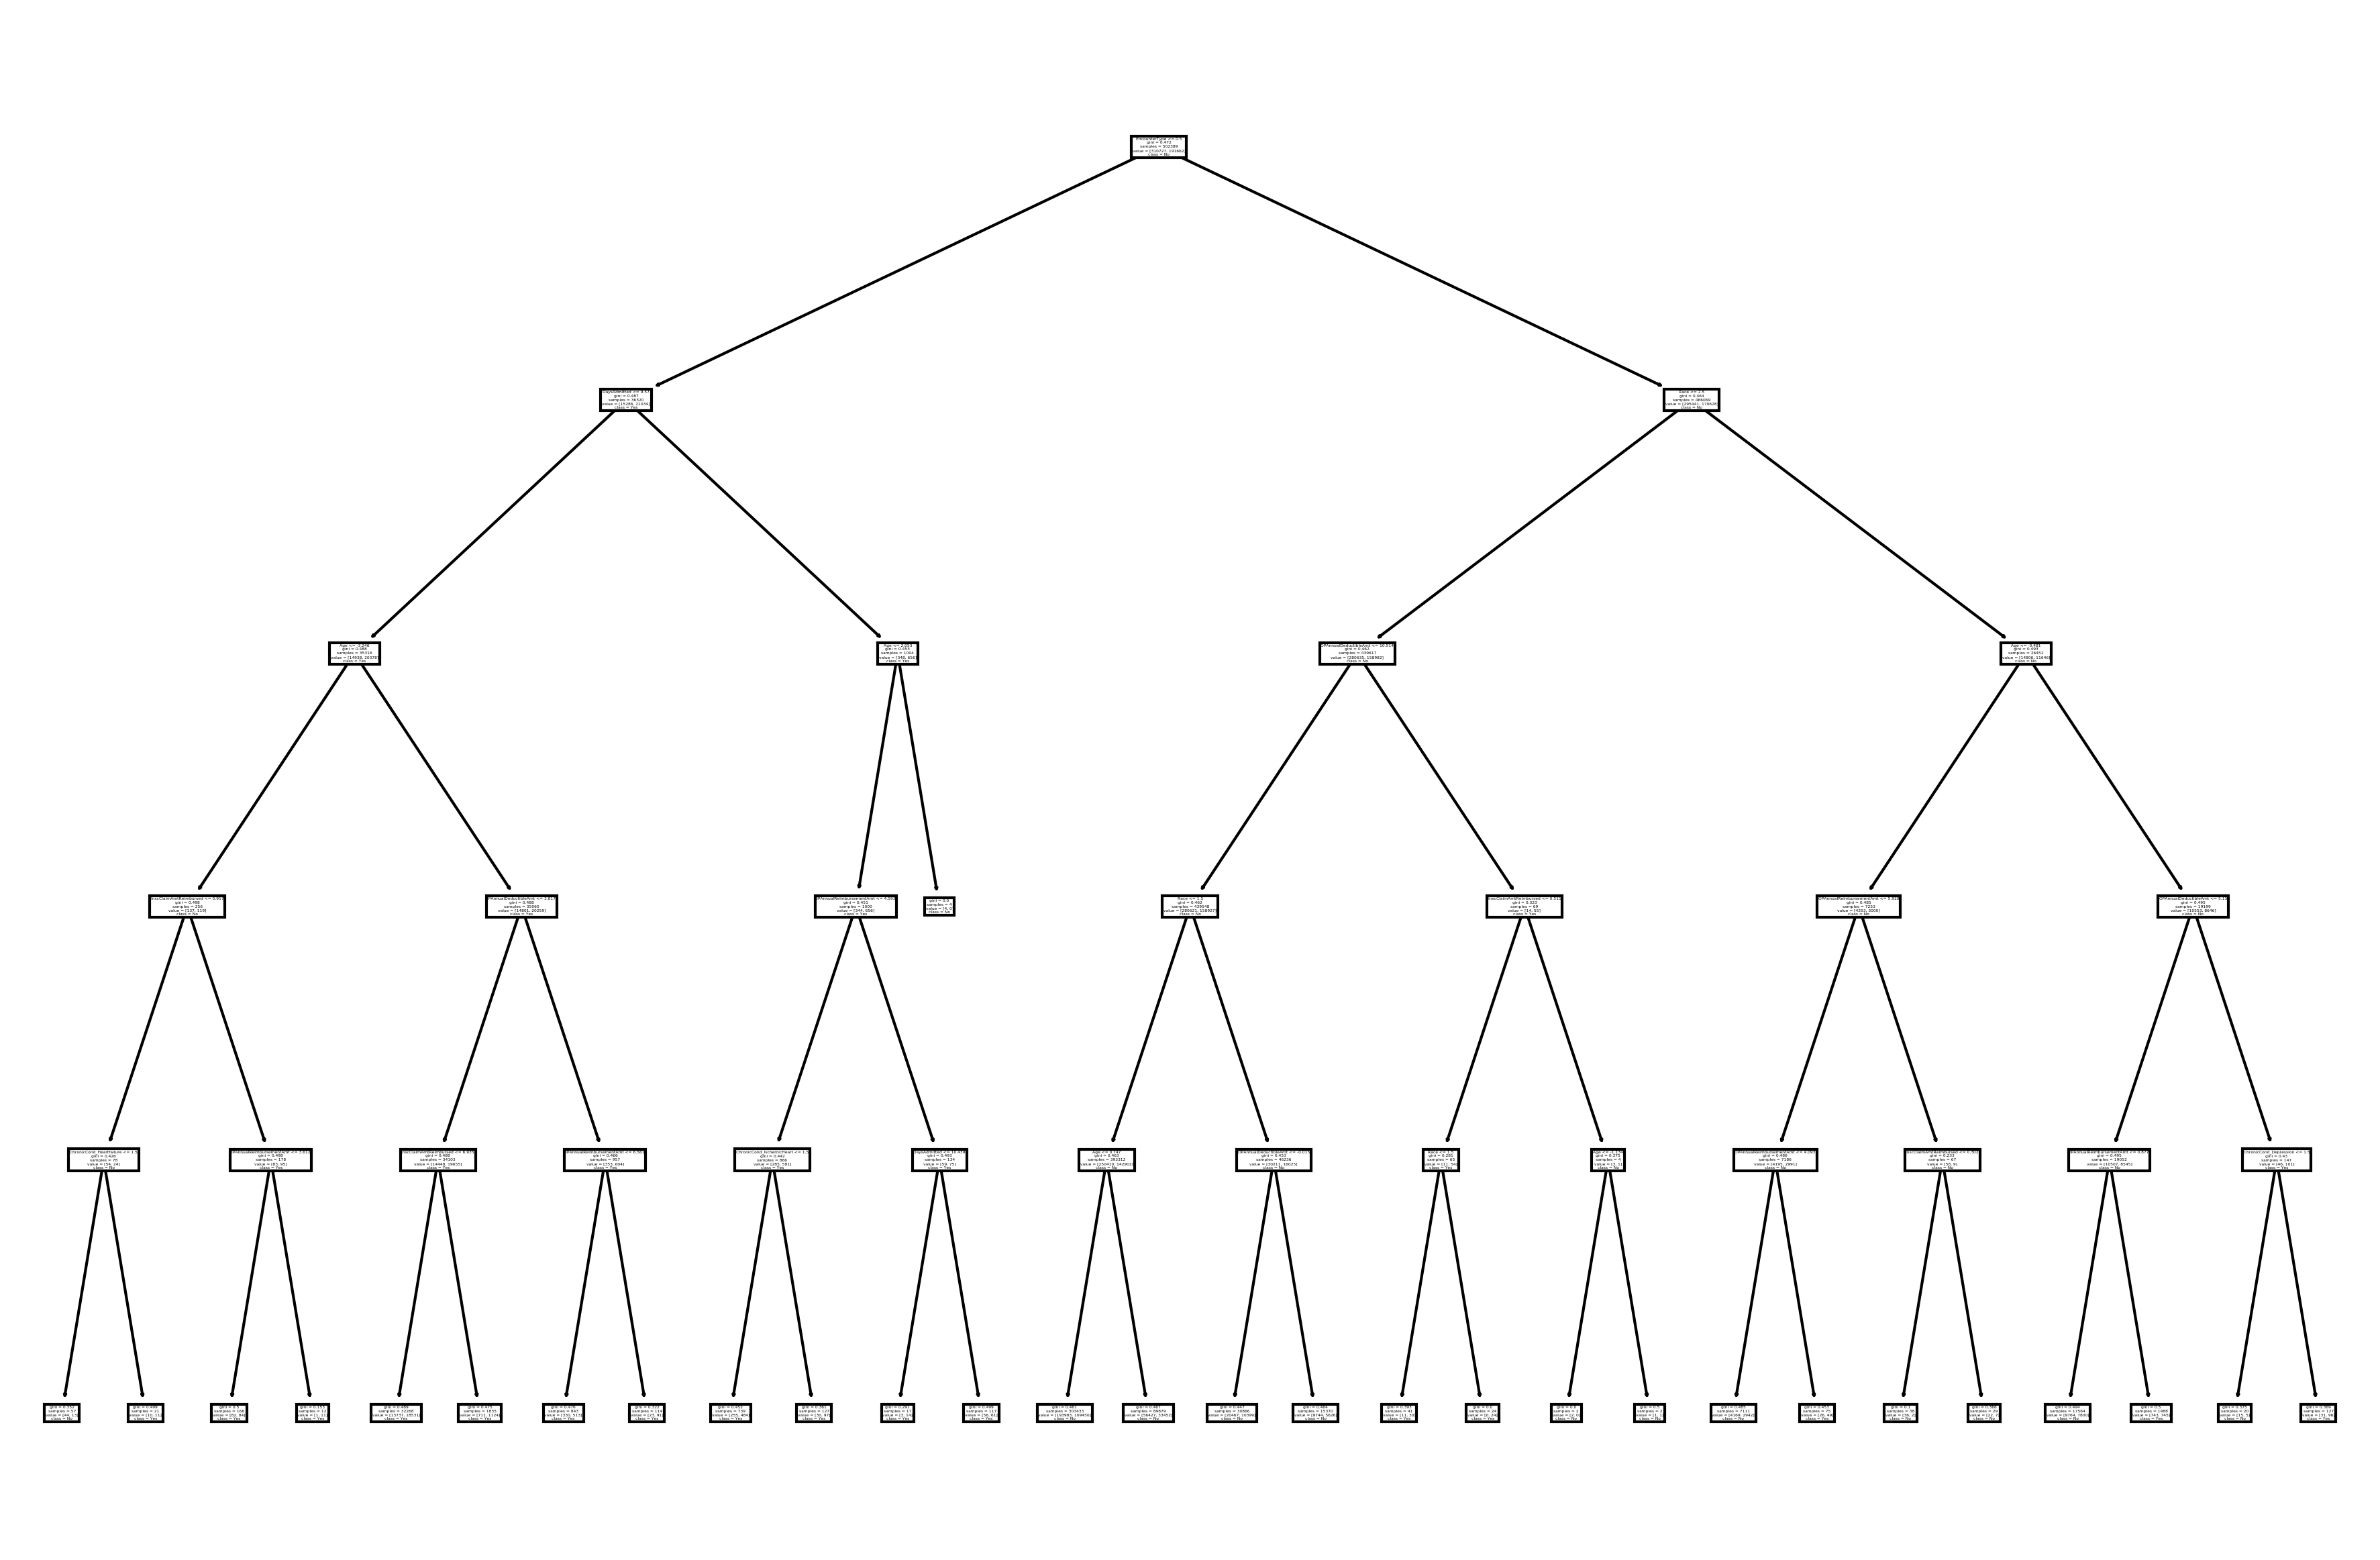

In [117]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,10), dpi=300)
tree.plot_tree(estimator, feature_names= fn, class_names=cl);

### Destandardizing values

In [119]:
m1= master_df['DaysAdmitted'].mean()
s1= master_df['DaysAdmitted'].std()
print((0.007*s1)+m1)
print((9.57*s1)+m1)
print((9.135*s1)+m1)

0.4993729535175565
22.49984964334079
21.49909597189113


In [121]:
m2= master_df['OPAnnualDeductibleAmt'].mean()
s2= master_df['OPAnnualDeductibleAmt'].std()
print((10.514*s2)+m2)

11184.945549354148


In [123]:
m3= master_df['Age'].mean()
s3= master_df['Age'].std()
print((-0.481*s3)+m3)

67.5059360038481


In [124]:
m4= master_df['InscClaimAmtReimbursed'].mean()
s4= master_df['InscClaimAmtReimbursed'].std()
print((10.075*s4)+m4)

39498.976164176456


###### Confusion matrix

In [125]:
confusion_matrix(y_test, accuracy)

array([[32803,  1885],
       [18684,  2450]])

In [126]:
tn, fp, fn, tp = confusion_matrix(y_test,accuracy).ravel()
(tn, fp, fn, tp)  

(32803, 1885, 18684, 2450)

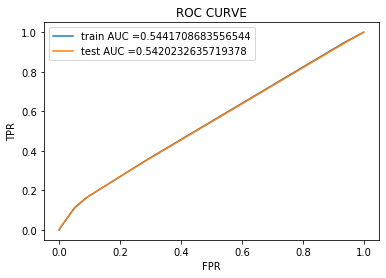

In [127]:
train_fpr, train_tpr, thresholds = roc_curve(y_train, estimator.predict_proba(x_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, estimator.predict_proba(x_test)[:,1])
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC CURVE")
plt.show()

### Random Forest

In [128]:
from sklearn.ensemble import RandomForestClassifier

In [129]:
estimator1= RandomForestClassifier()
estimator1.fit(x_train, y_train)
model_score= estimator1.predict(x_train)
accuracy= estimator1.predict(x_test)
start = time.time()
estimator1.score(x_train, y_train)
acc_random_forest = round(accuracy_score(y_test,accuracy)*100, 2)
f1_random_forest = round(f1_score(y_test,accuracy,average = "binary")*100, 2)
f_beta_random_forest = round(fbeta_score(y_test,accuracy,average = "binary",beta=0.5)*100, 2)
end = time.time()
acc_score.append({'Model':'Random Forest', 'Score': accuracy_score(y_train, model_score), 'Accuracy': accuracy_score(y_test, accuracy),'Time_Taken':end - start})

/home/betty/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [130]:
confusion_matrix(y_test, accuracy)

array([[28610,  6078],
       [11820,  9314]])

In [131]:
tn, fp, fn, tp = confusion_matrix(y_test,accuracy).ravel()
(tn, fp, fn, tp)  

(28610, 6078, 11820, 9314)

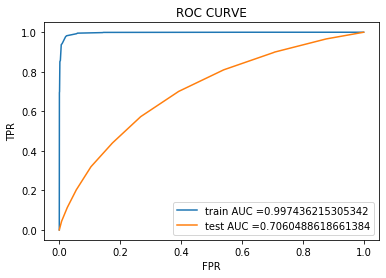

In [132]:
train_fpr, train_tpr, thresholds = roc_curve(y_train, estimator1.predict_proba(x_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, estimator1.predict_proba(x_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC CURVE")
plt.show()

In [133]:
y_test_rf= y_test.reset_index()
y_test.head()

230744    1
27826     1
314625    0
140256    0
502955    0
Name: PotentialFraud, dtype: int64

In [134]:
x_test_rf=  x_test.reset_index()
x_test.head()

,InscClaimAmtReimbursed,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,DaysAdmitted,TotalDiagnosis,TotalProcedure,EncounterType,...,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IsDead
230744,-0.229492,-0.443565,-0.482336,-0.535371,-0.628429,0.555210,-0.210064,-0.004451,-0.19091,1,...,2,1,2,2,2,2,2,2,2,0.0
27826,-0.260893,-0.443565,-0.482336,-0.579164,-0.608470,-0.519851,-0.210064,-1.229836,-0.19091,1,...,1,2,2,2,1,1,2,1,2,0.0
314625,-0.253043,0.769712,1.329105,0.708884,-0.179337,-0.443061,-0.210064,-0.412913,-0.19091,1,...,2,2,2,2,1,1,1,1,2,0.0
140256,-0.253043,-0.443565,-0.482336,-0.403990,-0.458772,-0.135901,-0.210064,0.812472,-0.19091,1,...,2,1,2,2,1,2,1,2,2,0.0
502955,-0.250426,-0.443565,-0.482336,-0.403990,-0.598490,1.246321,-0.210064,-0.821374,-0.19091,1,...,2,2,2,2,2,1,1,2,2,0.0


In [137]:
accuracy= accuracy.reshape(55822,1)
accuracy.shape

(55822, 1)

In [139]:
accuracy = pd.DataFrame(accuracy, columns=['Predict'])
accuracy

,Predict
0,0
1,0
2,0
3,0
4,0
...,...
55817,0
55818,1
55819,1
55820,0


In [141]:
predictor = pd.concat([y_test_rf,accuracy], axis =1)
predictor

,index,PotentialFraud,Predict
0,230744,1,0
1,27826,1,0
2,314625,0,0
3,140256,0,0
4,502955,0,0
...,...,...,...
55817,552465,0,0
55818,215575,1,1
55819,144212,0,1
55820,201007,0,0


In [142]:
Index_label = predictor[(predictor['PotentialFraud'] ==1) & (predictor['Predict']==1)]
indicies= Index_label['index']

In [143]:
wrong_predictions= master_df.iloc[indicies,:]
wrong_predictions

,EncounterType,InscClaimAmtReimbursed,Gender,Race,RenalDiseaseIndicator,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,...,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,PotentialFraud,IsDead,DaysAdmitted,TotalDiagnosis,TotalProcedure
53395,1,50,2,1,0,2,1,1,2,1,...,0,0,420,80,68.0,1,0.0,0.0,1.0,0.0
103756,0,53000,2,1,1,2,1,1,2,2,...,57500,1068,530,550,83.0,1,0.0,16.0,9.0,2.0
195710,1,400,1,1,0,2,1,2,2,2,...,0,0,610,430,68.0,1,0.0,0.0,7.0,0.0
43866,1,300,2,1,0,1,2,2,2,2,...,0,0,1070,330,96.0,1,0.0,0.0,7.0,0.0
44359,1,70,2,1,0,2,2,2,2,2,...,0,0,4710,1370,95.0,1,0.0,0.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179605,1,50,2,1,0,2,1,1,2,1,...,30000,1068,890,390,66.0,1,0.0,0.0,4.0,0.0
344643,1,60,2,1,1,2,1,2,2,2,...,2000,1068,5760,1000,71.0,1,0.0,0.0,1.0,0.0
458648,1,90,1,1,0,2,2,2,1,2,...,0,0,290,10,99.0,1,0.0,0.0,3.0,0.0
215575,0,9000,1,1,0,1,1,1,2,1,...,22000,3204,1550,210,48.0,1,0.0,3.0,4.0,1.0


In [144]:
print('Fraud Insurance Claims detected - ',wrong_predictions['InscClaimAmtReimbursed'].sum())
print('Fraud Insurance Claims for Inpatients detected - ',wrong_predictions['IPAnnualReimbursementAmt'].sum())
print('Fraud Insurance Claims for Outpatients detected - ',wrong_predictions['OPAnnualReimbursementAmt'].sum())

Fraud Insurance Claims detected -  16723850
Fraud Insurance Claims for Inpatients detected -  64260070
Fraud Insurance Claims for Outpatients detected -  24655220


In [145]:
fraud_index= y_test_rf[y_test_rf['PotentialFraud']==1]
indicies1= fraud_index['index']

In [146]:
frauds= master_df.iloc[indicies1,:]
frauds

,EncounterType,InscClaimAmtReimbursed,Gender,Race,RenalDiseaseIndicator,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,...,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,PotentialFraud,IsDead,DaysAdmitted,TotalDiagnosis,TotalProcedure
230744,1,120,2,1,0,2,2,2,1,2,...,0,0,200,20,81.0,1,0.0,0.0,3.0,0.0
27826,1,0,1,1,1,2,2,1,2,2,...,0,0,30,40,67.0,1,0.0,0.0,0.0,0.0
53395,1,50,2,1,0,2,1,1,2,1,...,0,0,420,80,68.0,1,0.0,0.0,1.0,0.0
159227,1,300,1,1,0,2,2,2,2,2,...,0,0,730,120,78.0,1,0.0,0.0,3.0,0.0
93009,1,1400,1,1,1,1,1,1,2,2,...,43200,2136,20190,5940,70.0,1,0.0,0.0,7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344643,1,60,2,1,1,2,1,2,2,2,...,2000,1068,5760,1000,71.0,1,0.0,0.0,1.0,0.0
458648,1,90,1,1,0,2,2,2,1,2,...,0,0,290,10,99.0,1,0.0,0.0,3.0,0.0
47840,1,40,2,1,0,1,2,2,2,2,...,0,0,1790,890,85.0,1,0.0,0.0,3.0,0.0
215575,0,9000,1,1,0,1,1,1,2,1,...,22000,3204,1550,210,48.0,1,0.0,3.0,4.0,1.0


In [147]:
print('Fraud Insurance Claims without model - ',frauds['InscClaimAmtReimbursed'].sum())
print('Fraud Insurance Claims for Inpatients without model - ',frauds['IPAnnualReimbursementAmt'].sum())
print('Fraud Insurance Claims for Outpatients without model - ',frauds['OPAnnualReimbursementAmt'].sum())

Fraud Insurance Claims without model -  30673230
Fraud Insurance Claims for Inpatients without model -  122946970
Fraud Insurance Claims for Outpatients without model -  48642580


In [148]:
print('Insurance Claim Amount Saved - $', 30673230- 23525520)
print('Inpatient Insurance Claim Amount Saved - $',122946970- 78254980)
print('Outpatient insurance Claim Amount Saved - $',48642580- 27754480)

Insurance Claim Amount Saved - $ 7147710
Inpatient Insurance Claim Amount Saved - $ 44691990
Outpatient insurance Claim Amount Saved - $ 20888100
